In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
SIZES = [100, 1000, 10000, 100000, 1000000, 5000000, 10000000]

In [5]:
def toData(dataSets):
    data =[]
    for i in range(len(SIZES)):
        dataSet = np.asarray(dataSets['two_' + str(SIZES[i]) + '_i32s']['runtimes'])
        average = np.average(dataSet)
        data.append(average)
    return [np.asarray(SIZES),np.asarray(data)]

In [6]:
def speedup(seq,mul):
    return [seq[0],seq[1] / mul[1]]

In [7]:
def plotBench(seq,mul,speed):

    fig, ax1 = plt.subplots()
    
    lns0 = ax1.plot(seq[0],seq[1], color='green',label="sequential runtime")
    lns1 = ax1.plot(mul[0],mul[1], color='blue', label="multicore runtime")
    
    ax1.set_ylabel('Runtime (ms)')
    ax1.set_xlabel('input size')
    ax1.set_xscale('log')
    
    
    
    ax2 = ax1.twinx()
    lns2 = ax2.plot(speed[0],speed[1], color='black',label="multicore speedup")
    ax2.set_ylabel('Speedup')

    leg = lns0 + lns1 + lns2
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=0)
        
    
    plt.show()
    

In [8]:
def plot(ex): 
    data_c = pd.read_json(ex+"_c.json")
    data_mul = pd.read_json(ex+"_multicore.json")

    seq = toData(data_c[ex+'.fut']['datasets'])
    mul = toData(data_mul[ex+'.fut']['datasets'])
    speed = speedup(seq,mul)
    plotBench(seq,mul,speed)






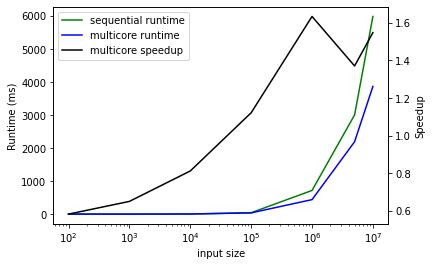

In [9]:
plot('e11')

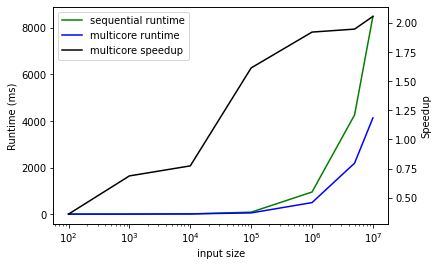

In [10]:
plot('e13')